In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
sys.path.extend(['d:\\atom\\python'])
import data_manager as dm
import clean_data as cleaner

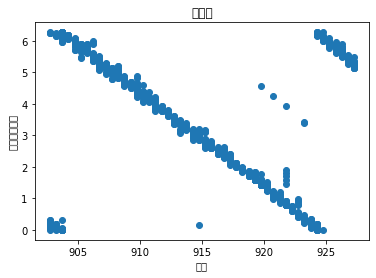

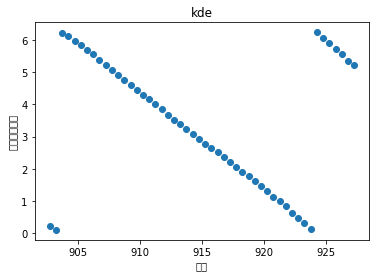

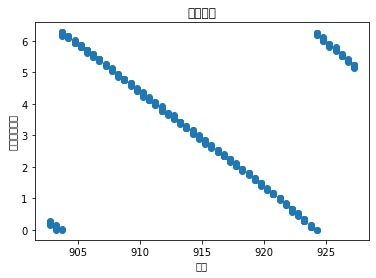

In [15]:
df =pd.read_csv('d:\\atom\\exp\\20210328\\kde\\vinegar_dirty.csv')
df = df.groupby('EPC').get_group('3008 33B2 DDD9 0140 0000 0060')
fig = plt.figure()
plt.scatter(df['CHANNEL'], df['PHASE'])
plt.xlabel('频率')
plt.ylabel('接收信号强度')
# plt.ylim(-60, -52)
plt.title('脏数据')
plt.show()

df_kde = cleaner.kde_peak(df)
plt.scatter(df_kde['CHANNEL'], df_kde['PHASE'])
plt.xlabel('频率')
plt.ylabel('接收信号强度')
# plt.ylim(-60, -52)
plt.title('kde')
plt.show()

df_t =pd.read_csv('d:\\atom\\exp\\20210328\\kde\\vinegar_clean.csv')
df_t = df_t.groupby('EPC').get_group('3008 33B2 DDD9 0140 0000 0060')
fig = plt.figure()
plt.scatter(df_t['CHANNEL'], df_t['PHASE'])
plt.xlabel('频率')
plt.ylabel('接收信号强度')
plt.title('干净数据')
# plt.ylim(-60, -52)
plt.show()

import scipy.io
scipy.io.savemat('kde.mat', {'dirty_c': df['CHANNEL'].values, 'dirty_r': df['RSSI'].values, 'dirty_p': df['PHASE'].values,
                            'kde_c': df_kde['CHANNEL'].values, 'kde_r': df_kde['RSSI'].values, 'kde_p': df_kde['PHASE'].values,
                            'truth_c': df_t['CHANNEL'].values, 'truth_r': df_t['RSSI'].values, 'truth_p': df_t['PHASE'].values})

In [11]:
df['PHASE']

0       0.110447
1       0.098175
2       0.110447
3       0.202485
4       5.080544
          ...   
3468    5.037593
3469    5.123496
3470    5.056001
3471    5.098952
3472    5.062137
Name: PHASE, Length: 2852, dtype: float64

In [5]:
df_t.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2852 entries, 0 to 3472
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CHANNEL  2852 non-null   float64
 1   DOPPLER  2852 non-null   float64
 2   EPC      2852 non-null   object 
 3   PHASE    2852 non-null   float64
 4   RSSI     2852 non-null   float64
 5   TIME     2852 non-null   object 
dtypes: float64(4), object(2)
memory usage: 156.0+ KB
